In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta as td
import matplotlib.pyplot as plt
import time

In [8]:
end = dt.datetime.today()
start = end - td(7)
end = end.strftime('%Y-%m-%d')
start = start.strftime('%Y-%m-%d')
interval = '1m'

def get_data(symbols, start=start, end=end, interval=interval):
    dataframes = []
    for symbol in symbols:
        ticker = yf.Ticker(symbol)
        ticker_df = ticker.history(start=start, end=end, interval=interval)
        ticker_df = ticker_df[['Close']]
        ticker_df.columns = [symbol]
        dataframes.append(ticker_df)
    df = dataframes[0].join(dataframes[1:])
    df.interpolate(inplace=True)
    return df

In [9]:
def normalize(df):
    df_normed = df.copy()
    for col in df:
        normed = df[col] / max(df[col])
        df_normed[col] = normed
    return df_normed

In [10]:
def plot(df):
    plt.figure(figsize=(10, 5))
    for col in df:
        plt.plot(df[col], label=col)
    plt.xticks(rotation=45)
    plt.title('Price Comparison, Normalized')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [11]:
def find_corr(df):
    """
    Find pearson correlation between cols in df and their derivatives
    """
    p = df.corr()
    print("Pearson correlation of price:", p)
    df1 = df.diff()
    p1 = df1.corr()
    print("Pearson correlation of first derivative:", p1)
    df2 = df1.diff()
    p2 = df2.corr()
    print("Pearson correlation of second derivative:", p2)
    return p

In [7]:
# df = get_data(['BTC-USD', 'BSV-USD', 'BCH-USD', 'ETH-USD', 'ADA-USD', 'XRP-USD'])
corrs = find_corr(df)

NameError: name 'df' is not defined

In [12]:
c = corrs.copy()
cols = corrs.columns
for i in range(len(corrs)):
    c[cols[i]].iloc[i] = np.NAN
display(c)
l = c.idxmax(axis=1)
l[0].index()

NameError: name 'corrs' is not defined

           BTC-USD  STX1-USD
BTC-USD   1.000000  0.587107
STX1-USD  0.587107  1.000000


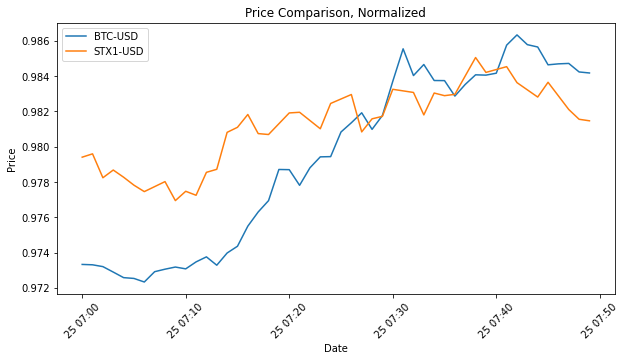

Pearson Correlation
           BTC-USD  STX1-USD
BTC-USD   1.000000  0.587107
STX1-USD  0.587107  1.000000


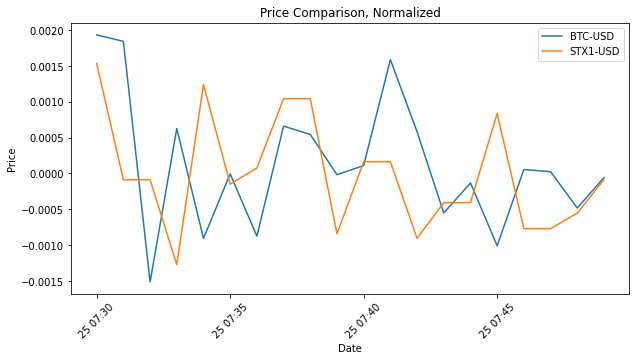

           BTC-USD  STX1-USD
BTC-USD   1.000000  0.357856
STX1-USD  0.357856  1.000000
Time Lagged Cross Correlation


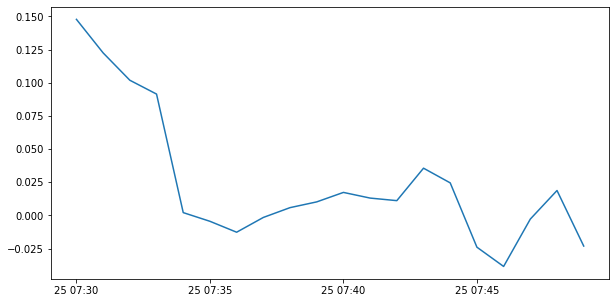

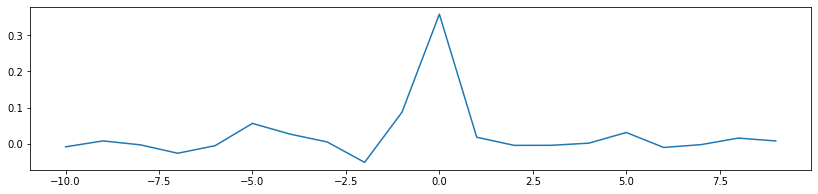

In [13]:
def compare(symbols):
    df = get_data(symbols)
    print(df.corr())
    df_normed = normalize(df)
    plot(df_normed[:50])
    print("Pearson Correlation")
    print(df_normed.corr())
    deriv_normed = df_normed.diff()
    plot(deriv_normed.iloc[30:50])
    print(deriv_normed.corr())
    plt.figure(figsize=(10, 5))
    plt.plot(deriv_normed[symbols[0]].rolling(window=30).corr(deriv_normed[symbols[1]])[30:50])
    print("Time Lagged Cross Correlation")
    rs_deriv = [deriv_normed[symbols[0]].corr(deriv_normed[symbols[1]].shift(lag)) for lag in range(-10, 10)]
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(range(-10, 10), rs_deriv)
    plt.show()

# compare(['BTC-USD', 'ETH-USD'])
compare(['BTC-USD', 'STX1-USD'])
# compare(['ADA-USD', 'XRP-USD'])